# Data Analysis : NYC Public Highschool SAT Performance

### Exploring how different variables such as race and location correlates with the SAT score in NewYork Public Highschools

# Project 2 

### Introduction

The Scholastic Aptitude Test (SAT) is a standardized test given to graduating high school students every year in the United States (US) before they apply to college. This standardized test can also be used in several other countries in order to achieve the same scale for admissions processes. The SAT consists of three sections: reading, writing, and mathematics; each of which has a maximum score of 800, giving a total possible SAT score of 2400. Such scores are used by universities and colleges as a key factor in whether a given student is admitted or not.

New York City has published a dataset of the average SAT scores for each section of the test for each of the public high schools in the city in the year 2014-2015. Further, for each school, race demographics are reported as well, such as the percentage of the school’s student body which is White, Black, Hispanic, or Asian. Other variables include the borough that the school is in, the zip code, the longitude and latitude of the school, the number of students enrolled in the school and the percentage that took the SAT.

The purpose of Project 1 is to thoroughly and properly clean this complex dataset. Then, we wish to explore any possible correlations and notable and important relationships between variables in the dataset.

One of the core themes of this analysis is understanding and investigating race disparities pertaining to the average SAT score in each section for a given school. Using variables such as the percentage of a school that is Asian or Black will allow us to investigate how scores relate to race. By doing so, we may be able to shed light on the common argument that the SAT tends to disadvantage certain minority groups. We will also examine how different boroughs perform in terms of the SAT. Thus, our dependent variable will be total average SAT score and our main independent variable will be percentage of different races in a given school.

Project 2 will then employ new visualizations to examine the relationships between our dependent variables and our independent variable. Taking our findings from Project 1, we plot our independent variable and dependent variable on an actual map of New York City to further examine how race and location can affect SAT scores. To do this, we use a dataset of variables such as borough and neighbourhood that allow us to form a map of New York City. Furthermore, we append our original dataset with a dataset concerning the economic need index and estimated school income for each of the public schools in our original dataset. This allows us to understand how factors such as a neighbourhood's economic need and the income of a given school can contribute to the relationships between location and race and total average SAT score.


## Part 1

### Data Analysis

We'll start off with plotting the raw data to see if there exists any particular trend of interest. Below we download all the necessary libraries and import our dataset and convert into a data frame using the Pandas.

In [3]:
#Downloading all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot
matplotlib.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

#!pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
#!pip install descartes

In [4]:
data_files = "scores.csv"
data = pd.read_csv("scores.csv")
df = pd.DataFrame(data)

Here we can see a glimpse of what our dataset looks like.

In [5]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
df.head(1).round(decimals=2)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75,-74.0,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll clean the data so that we could use it to continue our analysis. We'll save this new dataframe as df_new

In [6]:
#Using our variables of interest and dropping the rest from our dataframe.
#Calling the new dataframe df_new which only contains our chosen variables
df_new = df.drop(["Street Address","State", "Phone Number", "Start Time", "End Time"], axis = 1)

df_new.head(1)

,School ID,School Name,Borough,Building Code,City,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,Manhattan,10001,40.75321,-73.99786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below we turn our columns into type numeric and mutate the dataframe in order to add a column called Total_avg_SAT_score which shows the total average SAT score for each school out of 2400 points.

In [7]:
# if you want to operate on multiple columns, put them in a list like so:
cols = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']

# pass them to df.replace(), specifying each char and it's replacement:
df_new[cols] = df_new[cols].replace({'\%': ''}, regex=True) #Removes the percentage sign from columns signifying race
df_new[cols] = df_new[cols].astype('float')

df_new['Total_AVG_SAT_score'] = df_new['Average Score (SAT Math)'] + df_new['Average Score (SAT Reading)'] + df_new['Average Score (SAT Writing)']

In [8]:
df_new.fillna(df_new.mean(), inplace=True) #replace all NA with the mean value of the column

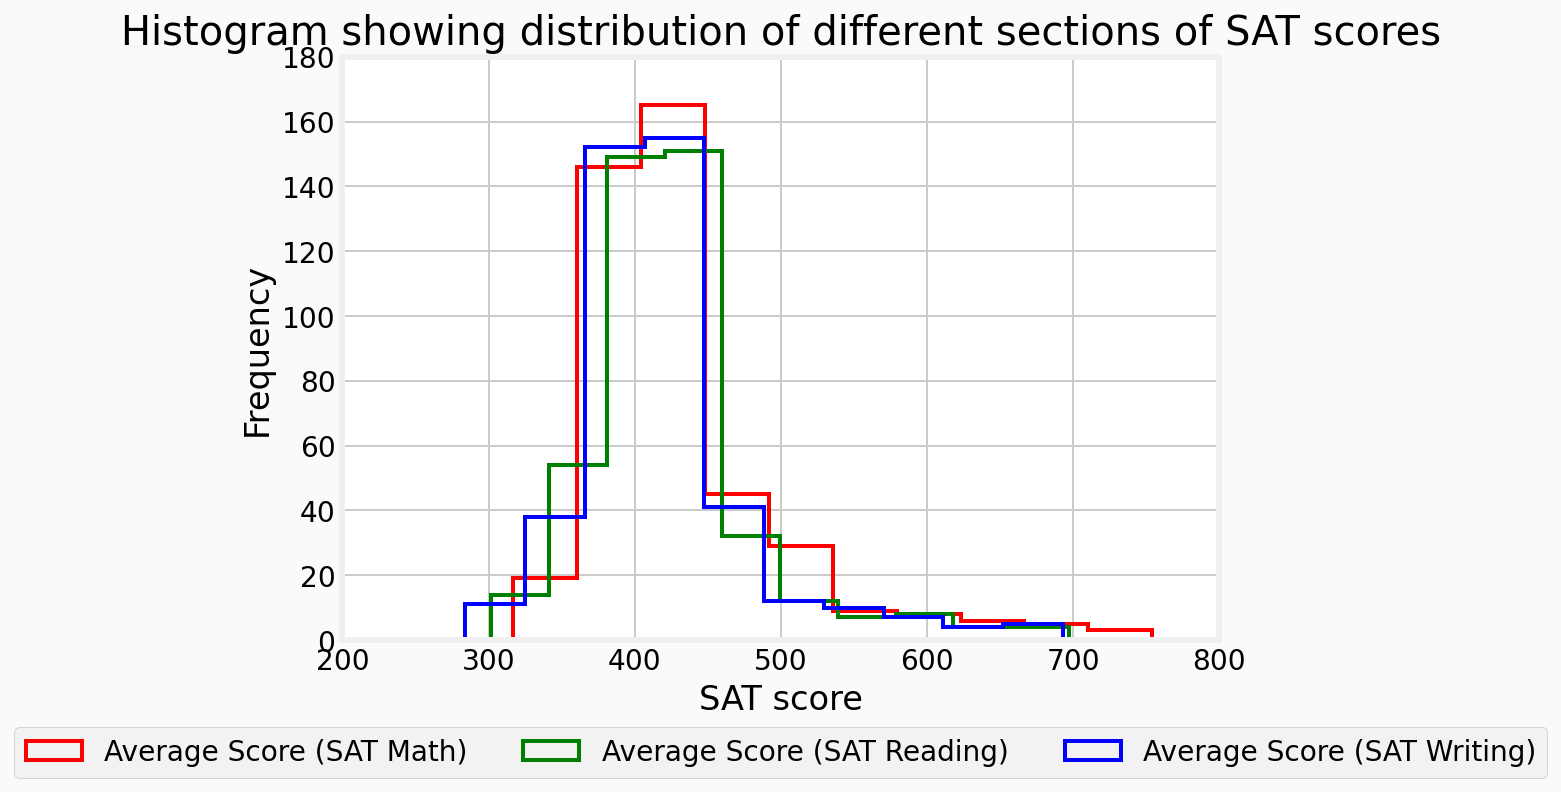

In [9]:
#raw data plotting 
fig, ax = plt.subplots(1, figsize=(7, 5))
X = df_new['Average Score (SAT Math)']
Y = df_new['Average Score (SAT Reading)']
Z = df_new['Average Score (SAT Writing)']

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor("white")

plt.hist(X,alpha=1,color = 'red',histtype='step',label = 'Average Score (SAT Math)',linewidth=2)
plt.hist(Y,alpha=1,color = 'green',histtype='step',label = 'Average Score (SAT Reading)',linewidth=2)
plt.hist(Z,alpha=1,color = 'blue',histtype='step',label = 'Average Score (SAT Writing)',linewidth=2)
plt.title("Histogram showing distribution of different sections of SAT scores", fontsize=20,color = 'Black',)
plt.xlabel('SAT score')
plt.ylabel('Frequency')

ax.set_xlim(200, 800)
ax.set_ylim(0,180)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.26), ncol=3)
plt.show()


From the above histogram we can see that the distribution of the SAT scores were highly concentrated around the range of 350 and 450 across all three sections. We also notice a right tail showing a very few schools achieving an average score above 600 which is in agreement with what we expect from a standardized test.



The dependent variable is the Total Average SAT score (Total_AVG_SAT_score). The independent variables that should be explantory of our dependent variable are the racial demographics of a school (eg: Percent Hispanic) as well as the region in New York City (Borough).

## Summary Statistics

In [10]:
#Summary stats for our variables of interest excluding zip-code
df_clean = ['Student Enrollment','Percent White','Percent Black','Percent Hispanic','Percent Asian',
             'Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)',
             'Total_AVG_SAT_score']
df_nozip = df_new.loc[:,df_clean]
df_nozip.describe().round(decimals=2)

,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Total_AVG_SAT_score
count,435.00,435.00,435.00,435.00,435.00,435.00,435.00,435.00,435.00
mean,702.36,8.31,35.31,44.31,10.17,432.94,424.50,418.46,1275.91
std,753.03,12.73,24.80,24.10,13.85,66.79,57.44,59.92,180.93
min,62.00,0.00,0.00,2.60,0.00,317.00,302.00,284.00,924.00
25%,358.00,1.30,17.35,21.90,1.60,390.00,391.50,386.00,1161.00
50%,470.00,2.70,28.80,45.30,4.50,423.00,421.00,411.00,1255.00
75%,635.50,8.80,47.70,63.30,11.10,446.00,435.00,427.00,1313.00
max,5447.00,79.90,94.10,100.00,88.90,754.00,697.00,693.00,2144.00


Above is a table of summary statistics of the relevant variables. What we see is that the mean of the average scores of each section of the SAT are relatively close, hovering around 425. Moreover, we also obtain standard deviations, minimums, maximums, and percentiles. If we look at the total average SAT score, we see that average is 1275.91 with a standard deviation of 180.93. Moreover, the range is 1220, suggesting a large amount of possible total scores. The median is 1255, suggesting that 50% of schools had a total average SAT score above 1255, and 50% had one below. We see the mean percentages of the different races and see that the average percentage white is smallest while the average percentage hispanic is highest.

Below, we have written code that itself produces the highest SAT scores for each section and code that produces the schools with the highest and lowest average SAT math scores.

In [11]:
#code to print summary 
print('The highest average SAT Math score was {} and the lowest was {}.'.format(
      int(data['Average Score (SAT Math)'].max()), int(data['Average Score (SAT Math)'].min())))
print('\t')
print('The highest average SAT Reading score was {} and the lowest was {}.'.format(
      int(data['Average Score (SAT Reading)'].max()), int(data['Average Score (SAT Reading)'].min())))
print('\t')
print('The highest average SAT Writing score was {} and the lowest was {}.'.format(
      int(data['Average Score (SAT Writing)'].max()), int(data['Average Score (SAT Writing)'].min())))

The highest average SAT Math score was 754 and the lowest was 317.
	
The highest average SAT Reading score was 697 and the lowest was 302.
	
The highest average SAT Writing score was 693 and the lowest was 284.


In [12]:
print("The school with the worst overall average SAT math score was {}".format(
      data.loc[data['Average Score (SAT Math)']==317, 'School Name'].values[0]))
print('\t')
print("The school with the best overall average SAT math score was {}.".format(
      data.loc[data['Average Score (SAT Math)']==754, 'School Name'].values[0]))

The school with the worst overall average SAT math score was Pan American International High School at Monroe
	
The school with the best overall average SAT math score was Stuyvesant High School.


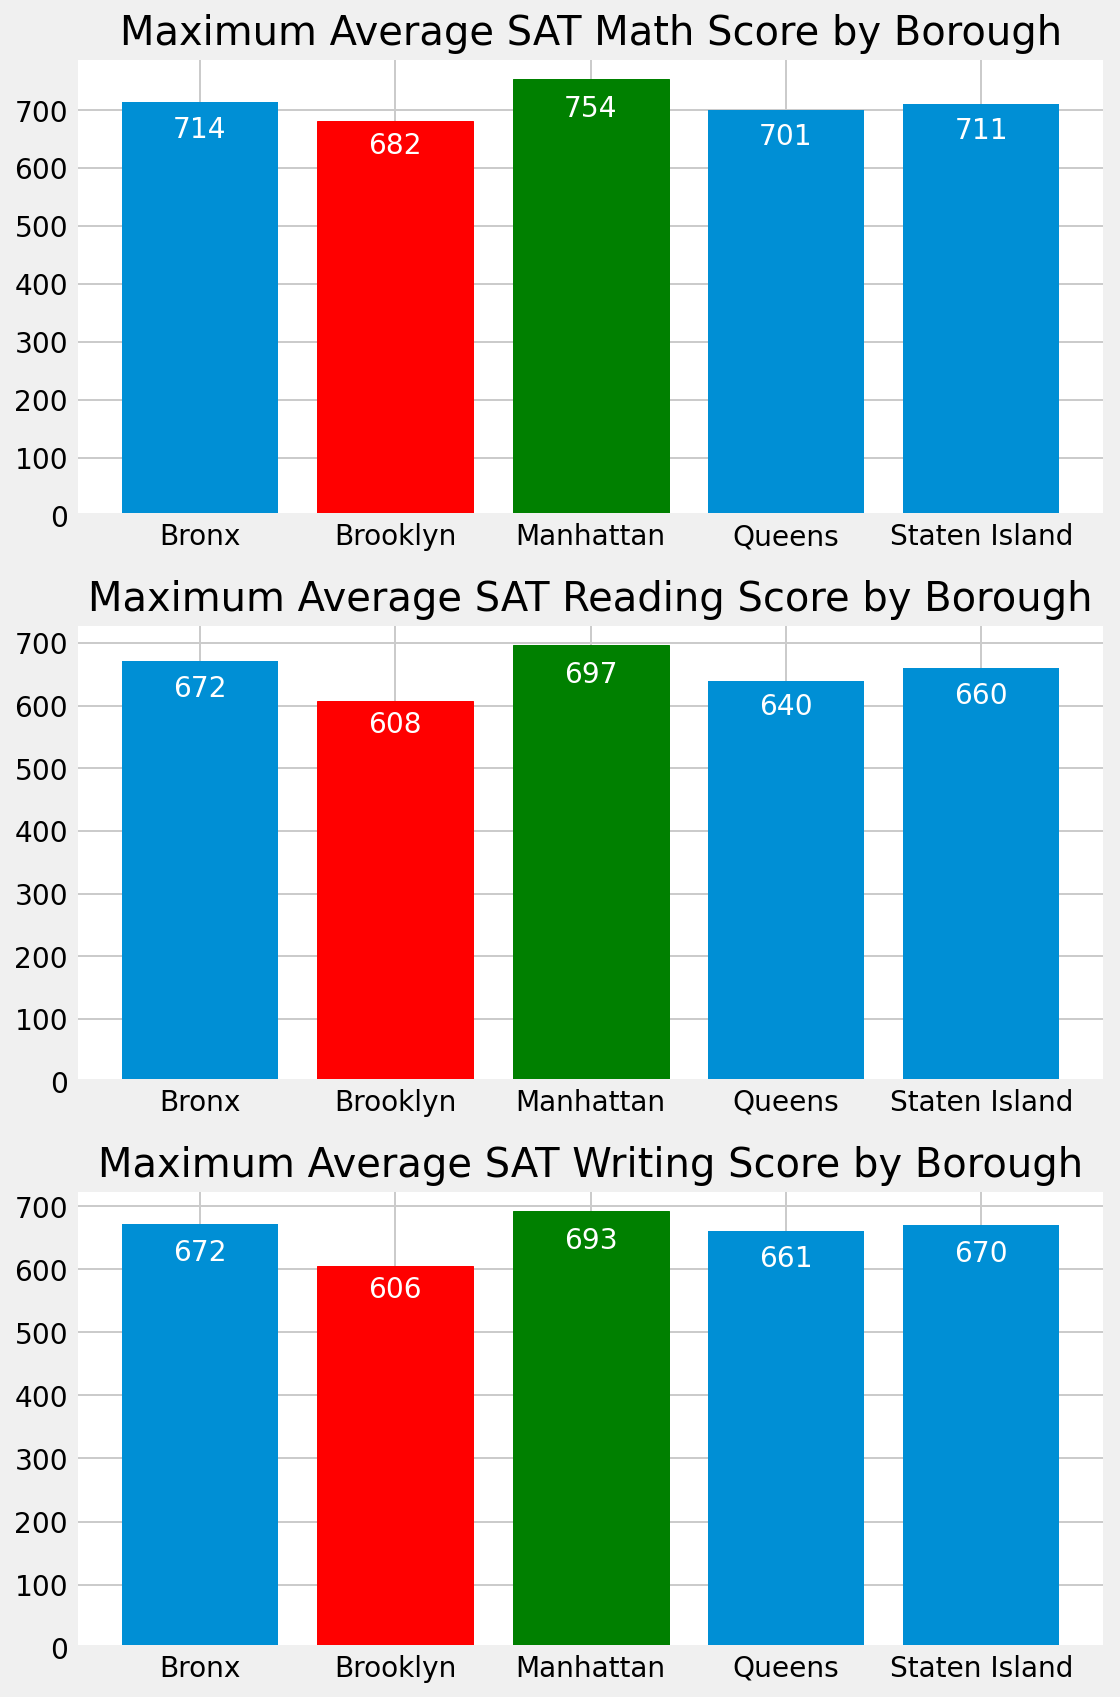

In [13]:
def barlabel(b, i):
    for bar in bars:
        height = bar.get_height()
        ax[i].text(bar.get_x()+bar.get_width()/2., 0.90*height, 
            '%d' % int(height), color='white', ha='center', va='bottom')

a = [0,1,2]   
tile = ['Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']
title = ["Maximum Average SAT Math Score by Borough","Maximum Average SAT Reading Score by Borough",
         "Maximum Average SAT Writing Score by Borough"]
        
fig, ax = plt.subplots(3,figsize=(8, 12))
ind = np.arange(5)
width = 0.35

for i in a:
    bars = ax[i].bar((ind+width), data.groupby('Borough')[tile[i]].max())
    ax[i].set_facecolor("white")
    ax[i].set_title(title[i], fontsize=20)
    ax[i].set_xlabel('')
    ax[i].set_xticks(ind+width/1.0)
    ax[i].set_xticklabels(labels=data.groupby('Borough')[tile[i]].max().index)
    barlabel(bars, i)
    bars[1].set_color('red')
    bars[2].set_color('green');
    
plt.tight_layout();

The three bar plots above depict the highest average SAT scores for each section and for each borough. We see that for all three sections, Manhattan has the highest score and Brooklyn has the lowest score in each. Indeed, we actually see that ranking the boroughs from highest to lowest maximum average SAT score in any given section is the same with the ranking being Manhattan, Bronx, Staten Island, Queens, and Brooklyn. 



### Below is the correlation matrix for our variables of interest.

In [14]:
correlations = df_nozip.corr()
correlations.round(decimals=4)

,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Total_AVG_SAT_score
Student Enrollment,1.0000,0.3756,-0.2605,-0.1862,0.4504,0.4332,0.3502,0.3520,0.3877
Percent White,0.3756,1.0000,-0.4085,-0.3297,0.3565,0.5861,0.6006,0.6103,0.6091
Percent Black,-0.2605,-0.4085,1.0000,-0.5781,-0.4076,-0.3602,-0.2271,-0.2544,-0.2893
Percent Hispanic,-0.1862,-0.3297,-0.5781,1.0000,-0.3594,-0.3580,-0.3988,-0.3875,-0.3871
Percent Asian,0.4504,0.3565,-0.4076,-0.3594,1.0000,0.6920,0.5028,0.5237,0.5885
Average Score (SAT Math),0.4332,0.5861,-0.3602,-0.3580,0.6920,1.0000,0.9282,0.9342,0.9732
Average Score (SAT Reading),0.3502,0.6006,-0.2271,-0.3988,0.5028,0.9282,1.0000,0.9854,0.9865
Average Score (SAT Writing),0.3520,0.6103,-0.2544,-0.3875,0.5237,0.9342,0.9854,1.0000,0.9889
Total_AVG_SAT_score,0.3877,0.6091,-0.2893,-0.3871,0.5885,0.9732,0.9865,0.9889,1.0000


We see from the above matrix many interesting observations. For example, there is a positive correlation between the percent Asian and percent White with total average SAT scores, with correlation values of 0.588538 and 0.609149 respectively. Contrastingly, the percent Black and percent Hispanic are negatively correlated with total average SAT scores with correlation values of -0.289327 and -0.387115 respectively. 

Furthermore, we see a positve correlation between average SAT math score and average SAT writing score with the value being 0.934155. This suggests that a school with a high average math SAT score would be expected to have a high average SAT writing score.

### Below is the relationship between our Y (Total Average SAT scores) and different X's

We will further explore the relationship between the number of students enrolled in a school and SAT score. We can explore this with a scatter plot that compares total enrollment across all schools to SAT scores across all schools. 

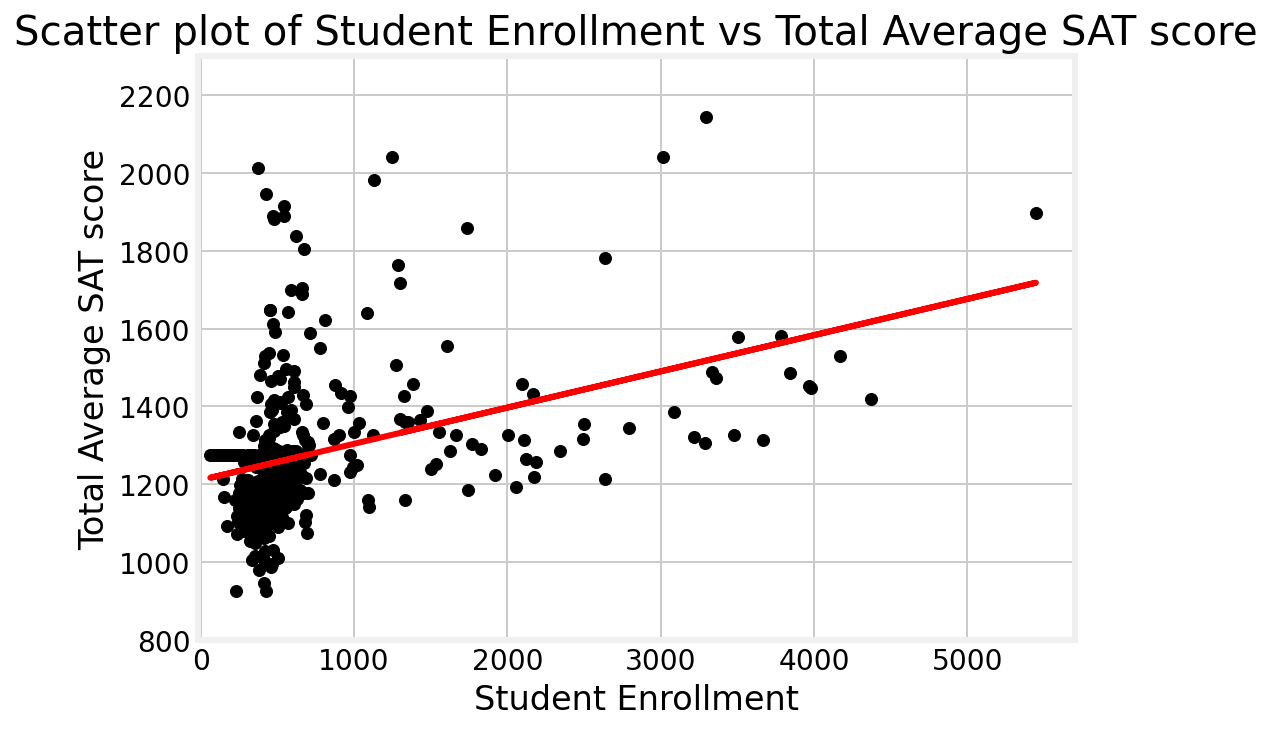

In [15]:
fig, ax = plt.subplots(1, figsize=(7, 5))

X = df_new['Student Enrollment']
y = df_new['Total_AVG_SAT_score']

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))
fig.set_facecolor("white")
ax.set_facecolor("white")

plt.scatter(X, y,alpha=1,color='black')
plt.plot(X, mymodel,alpha=1,color = 'red',linewidth=3)
plt.title('Scatter plot of Student Enrollment vs Total Average SAT score')
plt.xlabel('Student Enrollment')
plt.ylabel('Total Average SAT score')

ax.set_xlim(-20, 5700)
ax.set_ylim(800,2300)

plt.show()

We notice a cluster of points at the bottom left with low total enrollment and low total average SAT scores. Apart from this cluster, there appears to only be a slight positive correlation between SAT scores and total enrollment which was also noticed in our correlation matrix.

Now, we'll explore the relationship between the total average SAT scores and one of the racial minorities. I have chosen the Percent Hispanic in order to understand the trend between our variables.

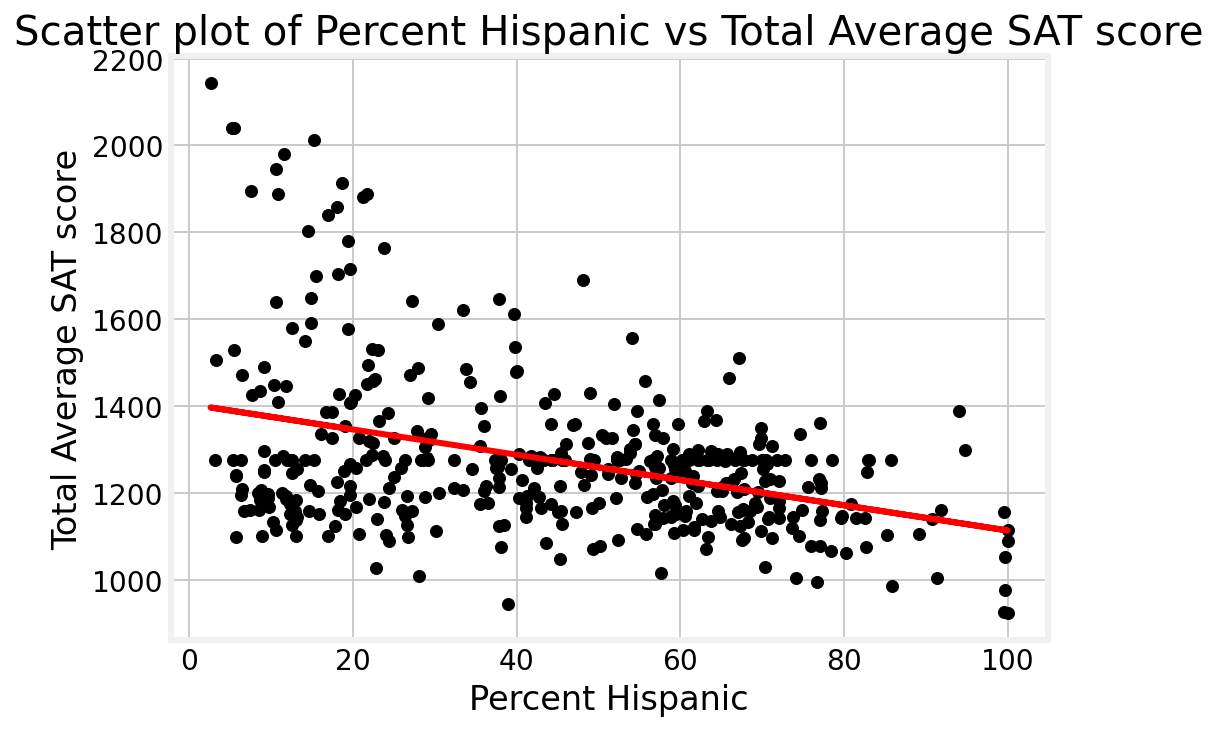

In [16]:
fig, ax = plt.subplots(1, figsize=(7, 5))

X = df_new['Percent Hispanic']
y = df_new['Total_AVG_SAT_score']

slope, intercept, r, p, std_err = stats.linregress(X, y)

mymodel = list(map(myfunc, X))

fig.set_facecolor("white")
ax.set_facecolor("white")

plt.scatter(X, y,alpha=1,color='black')
plt.plot(X, mymodel,alpha=1,color = 'red',linewidth=3)
plt.title('Scatter plot of Percent Hispanic vs Total Average SAT score')
plt.xlabel('Percent Hispanic')
plt.ylabel('Total Average SAT score')
plt.show()

Our points seems to be following a 'fanning' effect (fan-in) where the points move inwards from left to right rather than exhibiting a consistent spread. We've plotted a line of best fit on our plot and we notice it consists of a negative gradient. This confirms the assumption of potential poor performance in schools with a higher amount of percent Hispanic. This could be used to support the initial allegations about the SAT being unfair to certain racial groups in the US.

## Summary and Future Steps

From all our summary statistics and analysis we've found that on average, Black/Hispanic have a lower total average SAT Performance Scores than White/Asian. This may be due to other factors that we might not have taken into account such as the fact that there are more recent immigrants who are English Language learners. This could be taken into account while constructing SAT reading and writing section and marking the students.

We also noticed from our scatterplot that for one particular school the student enrollment number was around 3000 and the average score was close to 2200. This is of particular interest as it is far away from what we would have expected from our prediction/line of best fit.

For our future steps, there are quite a few insights that we'll need to explore. For example, the total student enrollment having a positive correlation with total average SAT scores. This is surprising, because you would think smaller schools, which focused more on the student, would have higher average SAT scores. Also, we notice quite a significant racial inequality in our total average SAT scores. Does this adequately confirms the statement that SAT acts as an unfair scale to certain racial groups in US and should be amended? Also the financial aspect for each school could also play a huge part while conducting this analyis. Does higher school funding result in students having better means in order to perform better in standardized tests? We can use several other datasets in order to get answers to these particular questions.



## Part 2

### THE MESSAGE

We want to enquire how the demographics such as race disparities pertaining to the average SAT score in each section for a given school. Do we see a relation between each race and the Total Sat scores?

![Caption](IMG_0038.png)
![Caption](IMG_0039.png)
![Caption](IMG_0050.png)

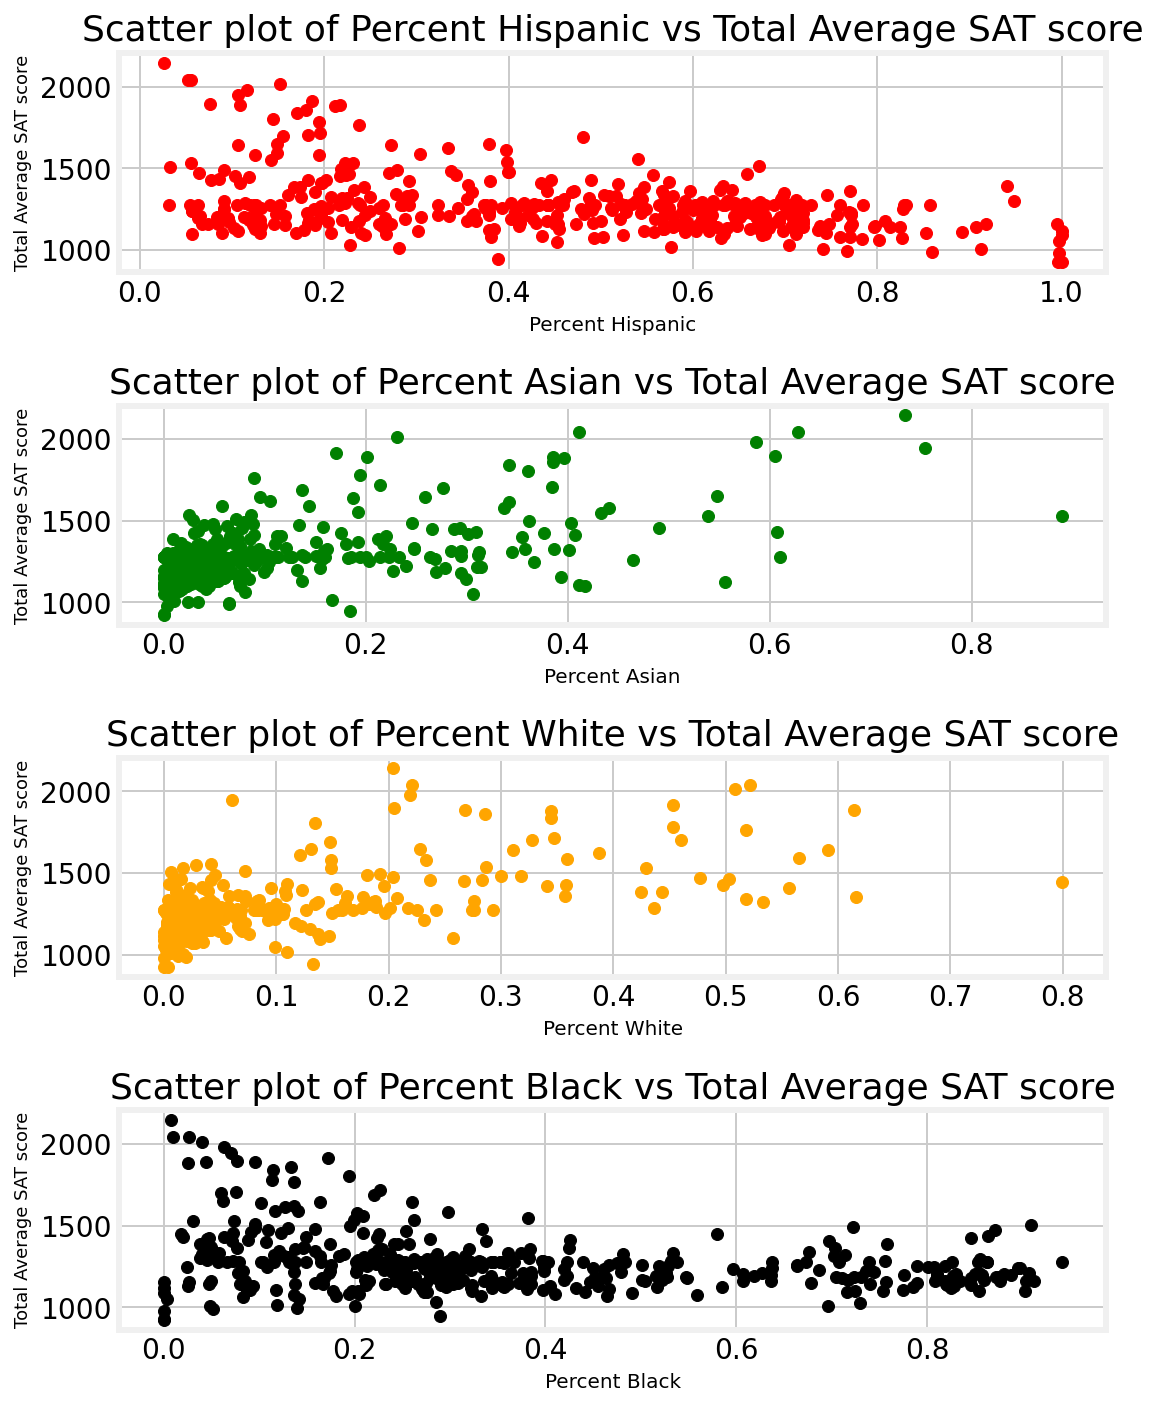

In [99]:
fig, ax = plt.subplots(4,1, figsize=(8,10))

a = [0,1,2,3]   
race_type = ['Percent Hispanic','Percent Asian','Percent White','Percent Black']
title = ["Scatter plot of Percent Hispanic vs Total Average SAT score",
         'Scatter plot of Percent Asian vs Total Average SAT score',
         'Scatter plot of Percent White vs Total Average SAT score',
         'Scatter plot of Percent Black vs Total Average SAT score']
      
X1 = df_new['Percent Hispanic']
X2 = df_new['Percent Asian']
X3 = df_new['Percent White']
X4 = df_new['Percent Black']
y = df_new['Total_AVG_SAT_score']

ax[0].scatter(X1, y,alpha=1,color='red')
ax[1].scatter(X2, y,alpha=1,color='green')
ax[2].scatter(X3, y,alpha=1,color='orange')
ax[3].scatter(X4, y,alpha=1,color='black')

for i in a:
    ax[i].set_title(title[i], fontsize=18)
    ax[i].set_xlabel(race_type[i],size=10)
    ax[i].set_ylabel('Total Average SAT score',size=9)
    ax[i].set_facecolor("white")
plt.tight_layout();
fig.patch.set_facecolor('white')
plt.show()

## Part 3

We'll first convert those columns whose values are measured in percentages into those measured in proportions, which will allow us to easily map the data.

In [18]:
#Converting into portions instead of percentage
def p2f(x):
    return float(x)/100
df_new['Percent Asian'] = df_new['Percent Asian'].apply(p2f)
df_new['Percent Black'] = df_new['Percent Black'].apply(p2f)
df_new['Percent Hispanic'] = df_new['Percent Hispanic'].apply(p2f)
df_new['Percent White'] = df_new['Percent White'].apply(p2f)

In order to map the city and the neighbourhoods, we need tuples of coordinates. We generate them by zipping the latitude and longitude together from df_new to store them in a new column named "Coordinates" in a new gdf dataframe. Below we can see a glimpse of what the dataset looks like with the geometry section added.

In [19]:
from shapely.geometry import Point
import geopandas as gpd
df_new["Coordinates"] = list(zip(df_new.Longitude, df_new.Latitude))
df_new["Coordinates"] = df_new["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_new,crs = 4326, geometry="Coordinates") #  Coordinate Reference System (CRS) tells Python how those coordinates relate to places on the Earth.
gdf.head(1)

,School ID,School Name,Borough,Building Code,City,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total_AVG_SAT_score,Coordinates
0,02M260,Clinton School Writers and Artists,Manhattan,M933,Manhattan,10001,40.75321,-73.99786,702.357477,0.083107,0.353072,0.443124,0.101657,432.944,424.504,418.458667,NaN,1275.906667,POINT (-73.99786 40.75321)


As our dataset doesn't consist of all the geometries of neighbourhoods, so we gather this information by bringing in a CSV file from the NYC Open Data Site. It has wkt in a geometry column. We can convert that to a GeoPandas Data Frame. 
We read the csv file and saved it in as a dataframe called "nbhoods". We rename certain columns such as "NTAName" to "neighbourhood" in order for us to later use this dataset to merge with our original df_new dataset. Again, we can see below what this new dataset looks like:  

In [20]:
from shapely import wkt
nbhoods = pd.read_csv('nynta.csv')
nbhoods.head(5)

nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')
nbhoods.head(2)

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,neighbourhood,Shape_Leng,Shape_Area,geom
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,4,MULTIPOLYGON (((-73.80379022888246 40.77561011...,81,Queens,QN51,Murray Hill,33266.904872,5.248828e+07,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."


In our dataset, df_new, we create a new column, called Percentile Tier, which uses the information on total average SAT score and the 25th, 50th, and 75th percentile of the average score from Project 1, to categorize each school according to whether their total average SAT score lied below the 25 percentile, between th 25th and 50th, between the 50th and 75th, or above the 75th. For example, if a total average score was 1000, this would fall below the 25th percentile, which is 1161.

In [21]:
conditions = [
    (df_new["Total_AVG_SAT_score"] <= 1161),
    (df_new["Total_AVG_SAT_score"] > 1161) & (df_new["Total_AVG_SAT_score"] <= 1255),
    (df_new["Total_AVG_SAT_score"] > 1255) & (df_new["Total_AVG_SAT_score"] <= 1313),
    (df_new["Total_AVG_SAT_score"] > 1313)
    ]

# create a list of the values we want to assign for each condition
values = ['0-25 Percentile', '25-50 Percentile', '50-75 Percentile', '75-100 Percentile']

# create a new column and use np.select to assign values to it using our lists as arguments
df_new['Percentile Tier'] = np.select(conditions, values)
df_new = df_new.sort_values("Percentile Tier")

We will now create a map of New York City that depicts how each school's total average SAT score fared with respect to the percentile tier process described above.

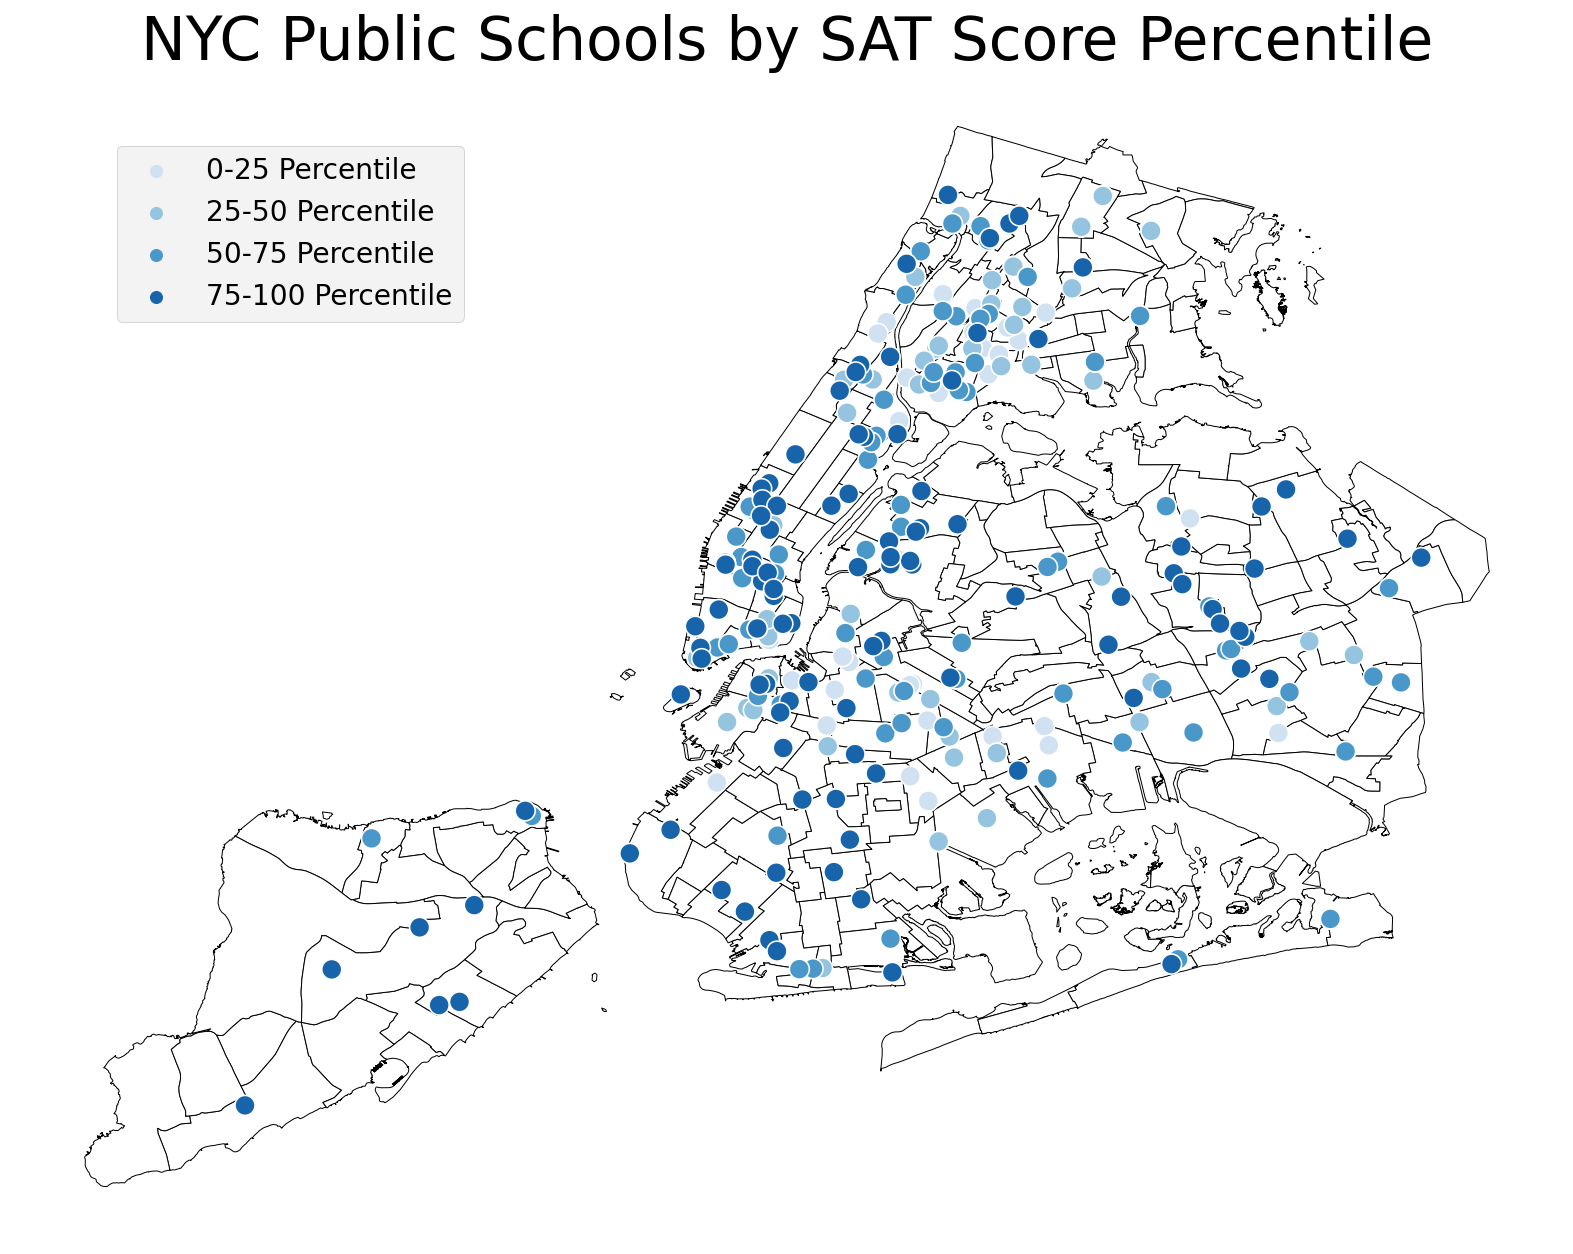

In [22]:
import seaborn as sns
fig, gax = plt.subplots(figsize=(15, 10))

fig.set_facecolor("white")
gax.set_facecolor("white")

nbhoods.plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x='Longitude', y='Latitude', hue='Percentile Tier',s=100, data=df_new,
               palette= "Blues",legend=True)

plt.axis('off') ##AXIS
plt.title("NYC Public Schools by SAT Score Percentile",size=30)
plt.legend(bbox_to_anchor = [0.3, 0.95])
plt.show()

We see some interesting things. First, we see that almost every school on Staten Island had a total average SAT score that was greater than the 75th percentile score. We also see a concentration of schools in the upper part of the city. Furthermore, as we move more north, we see that there are less public schools whose total average SAT score lie above the median. We could hypothesize that more northern parts of the city may have less income and resources to work with.

In the map above, each neighbourhood had multiple schools and hence we could not adequately explore the effect of neighbourhood on the total average SAT score. To alleviate this problem we take the average of the total average SAT scores for all the schools in a given neighbourhood.

Then, after altering column names in our original dataset and grouping by neighbourhood, we conduct a spatial join to create a new dataset called joined, a glimpse of which is below.

In [23]:
#We are going to manipulate our original datas in order to colour neighbourhoods based on Total_SAT_scores
data = pd.read_csv("scores.csv")
data.rename(columns={'Borough':'boroname'}, inplace=True)
data.rename(columns={'City':'neighbourhood'}, inplace=True)

In [24]:
#Use original data with geographic locations and rename the columns in order to e consistent for merging.
nbhood_count = data.groupby('neighbourhood').agg('mean').reset_index()
nbhoods.rename(columns={'City':'neighbourhood'}, inplace=True)

In [25]:
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

#Now, we do a spatial join.
joined = gpd.sjoin(nbhoods, data, how='inner', op='intersects')
joined.head(2)

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,neighbourhood_left,Shape_Leng,Shape_Area,geom,index_right,School ID,School Name,boroname,Building Code,Street Address,neighbourhood_right,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...",272,20K505,Franklin Delano Roosevelt High School,Brooklyn,K505,5800 20th Avenue,Brooklyn,NY,11204,40.62026,-73.98201,718-621-8800,9:30 AM,4:15 PM,3220.0,18.6%,11.5%,29.3%,40.1%,504.0,411.0,407.0,54.0%
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...",271,20K609,Urban Assembly School for Criminal Justice,Brooklyn,K223,4200 16th Avenue,Brooklyn,NY,11204,40.63491,-73.98152,718-438-3893,8:45 AM,3:45 PM,496.0,15.0%,17.5%,20.4%,46.5%,428.0,413.0,417.0,83.6%


We then make our total average SAT score column for this new dataset. Then, we merge our two datasets on neighbourhoods. Then, we create a map of total average SAT score by neighbourhood. 

In [26]:
#We'll add our Total_AVG_SAT_score column into this data 
joined['Total_AVG_SAT_score'] = joined['Average Score (SAT Math)'] + joined['Average Score (SAT Reading)'] + joined['Average Score (SAT Writing)']
joined.drop(columns='geom', inplace=True)

#We clean up our columns after the join by renaming neighbourhood_left to neighbourhood again.
#Then groupby neighbourhoods and call the dataframe nb_join_count
joined.rename(columns={'neighbourhood_left':'neighbourhood'}, inplace=True)
nb_join_count = joined.groupby('neighbourhood').agg('mean').reset_index()

In [27]:
# After merging our two datasets on neighbourhood and calling it true_count, we are able to create a map with 
# shaded neighbourhoods based on SAT Scores
true_count = nbhoods.merge(nb_join_count, on='neighbourhood')

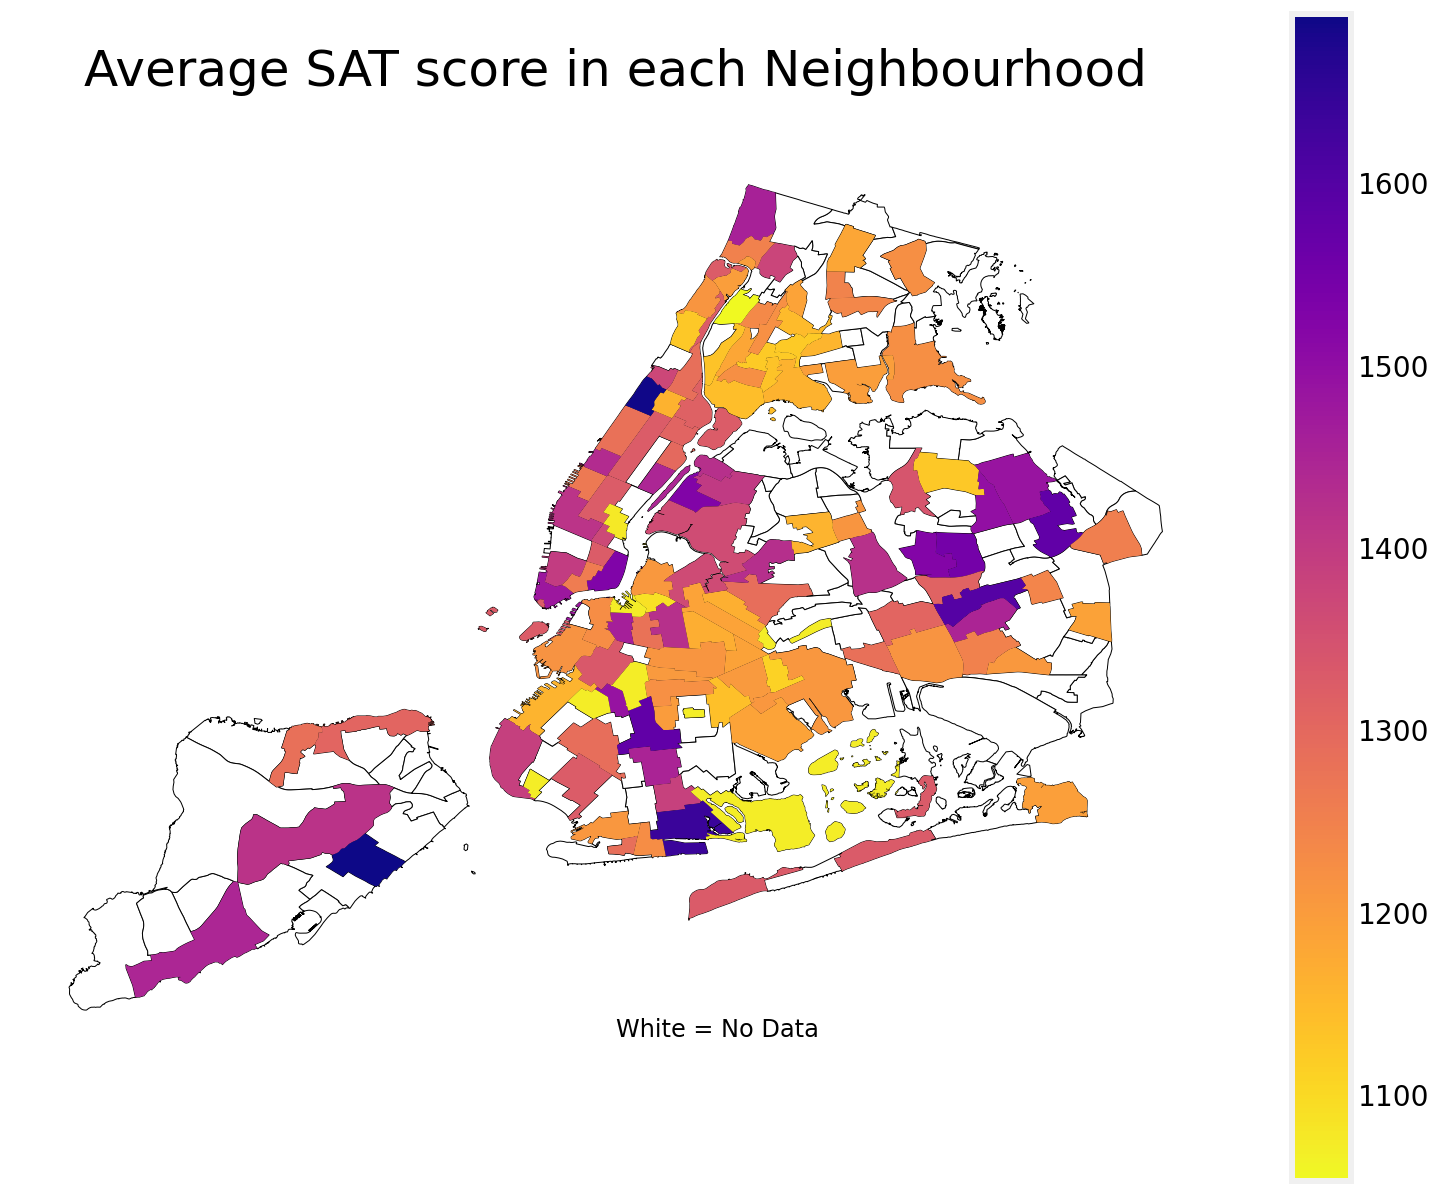

In [28]:
fig,ax = plt.subplots(1,1, figsize=(12,10))

base = nbhoods.plot(color='white', edgecolor='black', ax=ax)

fig.set_facecolor("white")
gax.set_facecolor("white")

true_count.plot(column='Total_AVG_SAT_score',cmap='plasma_r', ax=base, legend=True)
ax.set_title('Average SAT score in each Neighbourhood',size=25,y=1.05)
ax.text(0.5, 0.01,'White = No Data',
       verticalalignment='bottom', horizontalalignment='left',
       transform=ax.transAxes,
       color='black', fontsize=12)
plt.axis('off')
plt.show()

What we see again is that as we move north, neighbourhoods tend to have lower total average SAT scores. Moreover, we see that in central New York City, there is also a concentration of neighbourhoods with lower scores around 1200. Also, we see a neighbourhood that has been coloured with a dark shade of navy blue, indicating that the average score in the neighbourhood is north of 1600. Moreover, we see a neighbourhood with a bright yellow colouring, indicating an average score south of 1100. Also, those neighbourhoods with no colouring are those where our dataset has no public schools for that neighbourhood.

## Addition of new dataset

So far we've only explored how our outcome variable varies based on variables such as longitude, latitude and neighbourhoods. Now we will explore how demographics such as race affect scores across New York City. Also we'll incorporate new additional explanatory variables such as Economic Need Index and School Income estimates in order to find some explore possible interesting underlying relationships that may help explain differing scores. The following csv file can be found on kaggle. We read the file and convert into dataset using pandas. We call this new dataset df_sch_index. We have a new variable now concerning a zip code's economic need index which measures how much schools in a given zip code have students who require food supplements or subsidizd housing, with values closer to 1 indicating a greater degree of need. Moreover, we also have measures of a school's estimated income. The dataset also includes variables such as percentage of students who are English Language Learners (ELL), attendance rate of students, and the average math proficiency. We could in the future use these variables to explore a larger scope of analysis.

Here we can see a glimpse of the dataset:

In [29]:
df_sch_index = pd.read_csv('2016 School Explorer.csv')
df_sch_index.head(1)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In the following codes we clean the variables of interest and replace any NA with 0. We then group by Zip Code so that we have one mean value for each zipcode and then take a subset of this dataset so that it only contains three columns with the two main being the Economic Need Index and the school income estimate. We then merge this additional dataset to our original df_new.

We then show a glimpse:

In [30]:
#Clean the School Income Estimate column so that it can be converted to type float.
df_sch_index['School Income Estimate'] = df_sch_index['School Income Estimate'].str.replace(',', '')
df_sch_index['School Income Estimate'] = df_sch_index['School Income Estimate'].str.replace('$', '')
df_sch_index['School Income Estimate'] = df_sch_index['School Income Estimate'].str.replace(' ', '')
df_sch_index['School Income Estimate'] = df_sch_index['School Income Estimate'].astype(float)

In [31]:
#Replace any NA with 0
df_sch_index['School Income Estimate'] = df_sch_index['School Income Estimate'].fillna(0)
df_sch_index['Economic Need Index'] = df_sch_index['Economic Need Index'].fillna(0)

In [32]:
# We will merge our new dataframe which was grouped by Zipcode to our original manipulated dataset i.e. df_new
df_sch_index.rename(columns={'Zip':'Zip Code'}, inplace=True)
df_group = df_sch_index.groupby("Zip Code").agg('mean')

df_group_main = df_group[["Economic Need Index","School Income Estimate" ]] #Only variables of interest at this point
#Merge our data so that our final set contains economic index
USE = df_new.merge(df_group_main, on='Zip Code',how='left') 
USE.fillna(0, inplace=True)
USE.head(1)

,School ID,School Name,Borough,Building Code,City,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total_AVG_SAT_score,Coordinates,Percentile Tier,Economic Need Index,School Income Estimate
0,12X388,Pan American International High School at Monroe,Bronx,X420,Bronx,10472,40.83137,-73.87882,428.0,0.0,0.0,1.0,0.0,317.0,315.0,292.0,65.6%,924.0,POINT (-73.87882 40.83137),0-25 Percentile,0.835364,17873.229091


Now we will use this dataset to plot the percent of a school's students who are Hispanic on a map of New York City.

In [100]:
import geopandas as gpd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

fig = px.scatter_mapbox(USE, lat = "Latitude", lon = "Longitude", hover_name = 'School Name', 
                        hover_data = ["Total_AVG_SAT_score","Economic Need Index", "School Income Estimate"],color = "Percent Hispanic",
                        color_continuous_scale = "algae",#[(0, "pink"), (0.5, "purple"), (1, "darkblue")],
                       zoom = 9.5, height = 500, width = 780)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":0, "l":0, "b":0})
fig.show()
fig.write_html("./path-to-file.html")


ModuleNotFoundError: No module named 'gmaps'

We used a scatter mapbox allowing us to hover over any given point and receive information such as the name of the school, the percentage of Hispanic students, and total average SAT score. Further, darker points represent schools with a higher percentage of Hispanic students.

We see that in the more northern parts of the city, schools tend to have a higher percentage of Hispanic students than other parts of the city. We also know, from past maps, that these are the same parts of the city with lower SAT scores, on average. Hence, we do observe some relationship between the percent of a school's student body that is Hispanic and total average SAT score.

Now we map another explanatory variable, the economic need index, on a map of New York City.

In [34]:
import geopandas as gpd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

fig = px.scatter_mapbox(USE, lat = "Latitude", lon = "Longitude", hover_name = 'School Name', 
                        hover_data = ["Total_AVG_SAT_score", "School Income Estimate"],
                        color = "Economic Need Index",
                        color_continuous_scale = "reds",#[(0, "pink"), (0.5, "purple"), (1, "darkblue")],
                       zoom = 9.5, height = 500, width = 780)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":0, "l":0, "b":0})
fig.show()

We used a scatter mapbox allowing us to hover over any given point and receive information such as the name of the school, the economic need index, and total average SAT score. Further, darker points represent schools with a higher economic need index.

We see that again, the northern part of the city has a higher concentration of darker points, indicating schools where there is a higher amount of the student body requiring one, or both, of food supplements or subsidized housing. Given that this is an area with lower average SAT scores, this can help show a correlation between economic need and SAT performance. This effect may be what is being shown by correlations between race demographics and scores as we also see a correlation between economic need and the percentage of the student body that is Hispanic. This map may also suggest that those areas with a higher concentration of darker points may require a higher degree of assistance.

In [35]:
def p2f(x):
    return x.strip('%')
def p2f2(x):
    return float(x)/100


In [36]:
df_sch_index['Percent Asian'] = df_sch_index['Percent Asian'].apply(p2f).apply(p2f2)
df_sch_index['Percent Black'] = df_sch_index['Percent Black'].apply(p2f).apply(p2f2)
df_sch_index['Percent Hispanic'] = df_sch_index['Percent Hispanic'].apply(p2f).apply(p2f2)
df_sch_index['Percent White'] = df_sch_index['Percent White'].apply(p2f).apply(p2f2)

In [37]:
data = [
    {
        'x': df_sch_index["Longitude"],
        'y': df_sch_index["Latitude"],
        'text': df_sch_index["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df_sch_index["Percent Black"],
            'size': df_sch_index["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Black Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

We now have a map that relates the percentage of a school's student population that is black and the school's income estimate. The colour of a given bubble indicates the percentage of black students in school's population. The size of the bubble indicates the school income estimate. 

First, we see that most schools with a high degree of black students is in central New York City. Interestingly, these are also some of the smallest bubbles indicating low school income estimates. Also, we know that central New York City tends to have low SAT scores. Hence, we see a relationship between the percentage of black students and school income estimates as well as between these variables and total SAT score. This map does suggest that there are racial disparities, as well as economic ones, that contribute to variations in total average SAT scores.

# Conclusion and future steps

In Project 1, we explored the relationship between variables such as race and location and the SAT score. We saw that schools in Manhattan ha the best average scores in each of the three sections of the SAT while Brooklyn schools performed the worst. We saw that the percentage of a school's student body that is White or Asian is positively correlated with the total average SAT score while percent Hispanic and percent Black are negatively correlated with total average SAT score. These findings indicated a geographic and racial aspect to SAT scores that warranted further analysis.

From all our summary statistics and analysis we've found that on average, Black/Hispanic have a lower total average SAT Performance Scores than White/Asian. This has also been supported by our maps as well. Areas of New York City where public schools tended to have a higher degree of Black and Hispanic students tended to have lower SAT scores. Acknowledging that there may be more to this relationship than purely race, we plotted maps that depicted schools' estimated income as well as economic need index. What we saw was a relationship between the economic need index, the percentage of a school's population that is Black or Hispanic, and total average SAT score. This sheds light on additional variables that are affecting total average SAT score. This could be taken into account while constructing SAT reading and writing section and marking the students.

This relationship between economic need and estimated income with a school's total average SAT score is interesting. For one, this may be of importance to policymakers as these areas with higher economic need and lower estimated income may require greater assistance 

For our future steps, there are significant areas ripe for continued exploration. For instance, we still need to explore the interaction between income, economic need, and race. Moreover, we need to see the true relationships between each of these terms and total average SAT score as well as their effects whiel controlling for the other factors. Doing so will allow us to more adequately derive true relationships between race and location with SAT scores.

## References

Lao, Randy. “Simple Exploratory Data Analysis - PASSNYC.” Kaggle. Kaggle, July 14, 2018. https://www.kaggle.com/randylaosat/simple-exploratory-data-analysis-passnyc. 

Data, NYC Open. “Average SAT Scores for NYC Public Schools.” Kaggle, March 7, 2017. https://www.kaggle.com/nycopendata/high-schools. 